# **Trabajo Final - DATASET MNIST**

**Grupo:** Ferreras Camila, Godoy Sthepanie Andrea

## Objetivos
El objetivo es implementar y evaluar redes neuronales para clasificación multiclase usando el dataset MNIST. El trabajo incluye:

1. Desarrollo de 3 redes densas con diferentes configuraciones de capas y neuronas.
2. Implementación de 2 arquitecturas de CNN.
3. Entrenamiento y evaluación de los modelos con análisis de resultados.

### Dataset: MNIST
El dataset MNIST es un conjunto de datos de imágenes en escala de grises (28x28 píxeles, 1 canal) que contiene 70,000 ejemplos divididos en 10 clases, correspondientes a los dígitos del 0 al 9. Se distribuye en 60,000 imágenes para entrenamiento y 10,000 para prueba.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


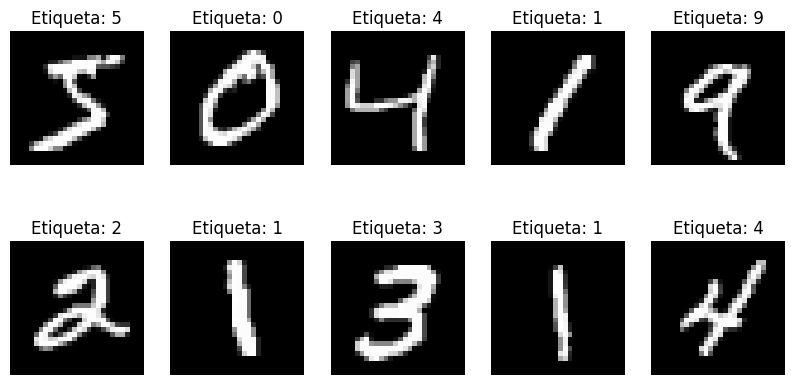

In [ ]:
# Importación de librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar y preparar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualización de ejemplos
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(f"Etiqueta: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


##**Crear Redes Neuronales densas y entrenarlas:**

Epoch 1/20
469/469 - 3s - 6ms/step - accuracy: 0.8893 - loss: 0.4086 - val_accuracy: 0.9425 - val_loss: 0.1995
Epoch 2/20
469/469 - 3s - 6ms/step - accuracy: 0.9508 - loss: 0.1705 - val_accuracy: 0.9576 - val_loss: 0.1412
Epoch 3/20
469/469 - 2s - 3ms/step - accuracy: 0.9620 - loss: 0.1287 - val_accuracy: 0.9624 - val_loss: 0.1215
Epoch 4/20
469/469 - 2s - 5ms/step - accuracy: 0.9690 - loss: 0.1053 - val_accuracy: 0.9683 - val_loss: 0.1095
Epoch 5/20
469/469 - 2s - 3ms/step - accuracy: 0.9738 - loss: 0.0881 - val_accuracy: 0.9694 - val_loss: 0.0997
Epoch 6/20
469/469 - 2s - 3ms/step - accuracy: 0.9776 - loss: 0.0754 - val_accuracy: 0.9704 - val_loss: 0.0958
Epoch 7/20
469/469 - 3s - 6ms/step - accuracy: 0.9803 - loss: 0.0662 - val_accuracy: 0.9727 - val_loss: 0.0879
Epoch 8/20
469/469 - 2s - 5ms/step - accuracy: 0.9826 - loss: 0.0572 - val_accuracy: 0.9680 - val_loss: 0.0959
Epoch 9/20
469/469 - 2s - 4ms/step - accuracy: 0.9837 - loss: 0.0510 - val_accuracy: 0.9711 - val_loss: 0.0881
E

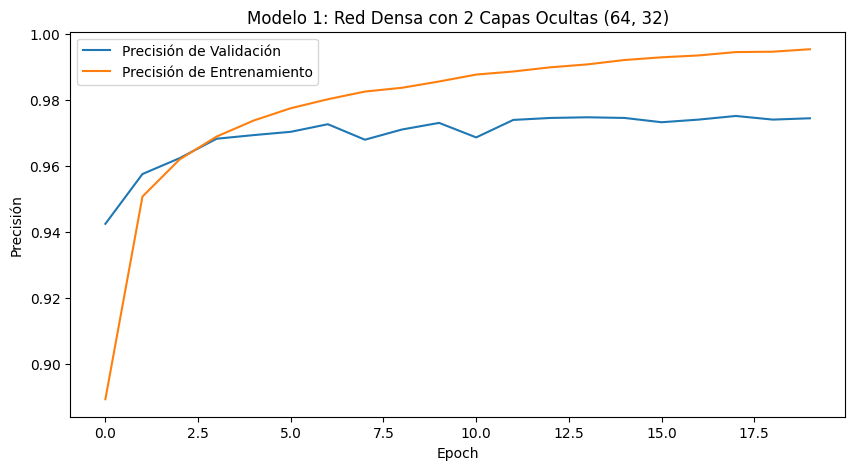

In [ ]:
# Modelo 1: Red Densa con 2 Capas Ocultas
def create_dense_model_1():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),  # Aplanar la entrada
        Dense(64, activation='relu'),     # Primera capa oculta con 64 neuronas
        Dense(32, activation='relu'),     # Segunda capa oculta con 32 neuronas
        Dense(10, activation='softmax')  # Capa de salida
    ])
    return model

# Crear el modelo
model_1 = create_dense_model_1()

# Compilar el modelo
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_1 = model_1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_1.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 1: Red Densa con 2 Capas Ocultas (64, 32)")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


Epoch 1/20
469/469 - 4s - 9ms/step - accuracy: 0.9049 - loss: 0.3266 - val_accuracy: 0.9595 - val_loss: 0.1418
Epoch 2/20
469/469 - 4s - 8ms/step - accuracy: 0.9625 - loss: 0.1265 - val_accuracy: 0.9667 - val_loss: 0.1121
Epoch 3/20
469/469 - 3s - 5ms/step - accuracy: 0.9722 - loss: 0.0903 - val_accuracy: 0.9687 - val_loss: 0.1022
Epoch 4/20
469/469 - 3s - 6ms/step - accuracy: 0.9788 - loss: 0.0685 - val_accuracy: 0.9734 - val_loss: 0.0918
Epoch 5/20
469/469 - 3s - 6ms/step - accuracy: 0.9825 - loss: 0.0559 - val_accuracy: 0.9743 - val_loss: 0.0827
Epoch 6/20
469/469 - 3s - 6ms/step - accuracy: 0.9852 - loss: 0.0459 - val_accuracy: 0.9761 - val_loss: 0.0778
Epoch 7/20
469/469 - 4s - 9ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9780 - val_loss: 0.0775
Epoch 8/20
469/469 - 3s - 5ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9786 - val_loss: 0.0736
Epoch 9/20
469/469 - 2s - 5ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9761 - val_loss: 0.0881
E

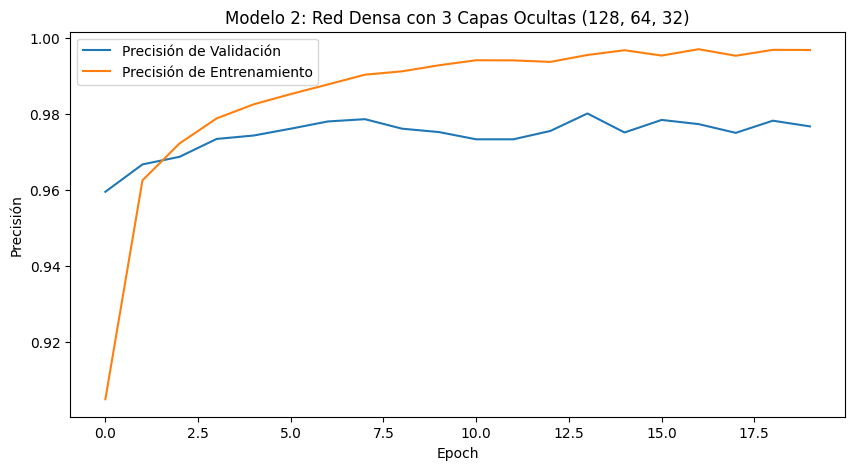

In [ ]:
# Modelo 2: Red Densa con 3 Capas Ocultas
def create_dense_model_2():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),  # Aplanar la entrada
        Dense(128, activation='relu'),    # Primera capa oculta con 128 neuronas
        Dense(64, activation='relu'),     # Segunda capa oculta con 64 neuronas
        Dense(32, activation='relu'),     # Tercera capa oculta con 32 neuronas
        Dense(10, activation='softmax')  # Capa de salida
    ])
    return model

# Crear el modelo
model_2 = create_dense_model_2()

# Compilar el modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_2 = model_2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_2.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 2: Red Densa con 3 Capas Ocultas (128, 64, 32)")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


###**Observacion del comportamiento del Modelo 1 respecto del Modelo 2:**

A lo largo de las primeras epocas de entrenamiento, observando como evolucionan las curvas de presion y las de perdida, vemos que el segundo modelo, converge mas rapidamente, es decir que llega mas rapidamente a su presición final/estabilidad que el primer modelo.

Aunque el modelo 2 converge mas rapido a valores cercanos a uno, el modelo uno ofrece mas estabilidad a largo plazo, y eso se debe a que presenta menos diferencias entre las presiciones y las perdidas. Esto se observa facilmente en las graficas generadas, en la del segundo modelo vemos picos mas pronunciados que en comparacion con la gráfica del primer modelo, que muestra curvas de validación más estables.




Epoch 1/20
469/469 - 5s - 11ms/step - accuracy: 0.9083 - loss: 0.3103 - val_accuracy: 0.9490 - val_loss: 0.1614
Epoch 2/20
469/469 - 6s - 13ms/step - accuracy: 0.9658 - loss: 0.1130 - val_accuracy: 0.9685 - val_loss: 0.1080
Epoch 3/20
469/469 - 4s - 8ms/step - accuracy: 0.9765 - loss: 0.0752 - val_accuracy: 0.9738 - val_loss: 0.0876
Epoch 4/20
469/469 - 3s - 7ms/step - accuracy: 0.9834 - loss: 0.0546 - val_accuracy: 0.9744 - val_loss: 0.0842
Epoch 5/20
469/469 - 6s - 13ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9771 - val_loss: 0.0775
Epoch 6/20
469/469 - 4s - 8ms/step - accuracy: 0.9889 - loss: 0.0336 - val_accuracy: 0.9780 - val_loss: 0.0764
Epoch 7/20
469/469 - 5s - 11ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9787 - val_loss: 0.0754
Epoch 8/20
469/469 - 6s - 14ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9764 - val_loss: 0.0855
Epoch 9/20
469/469 - 4s - 8ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9772 - val_loss: 0.0

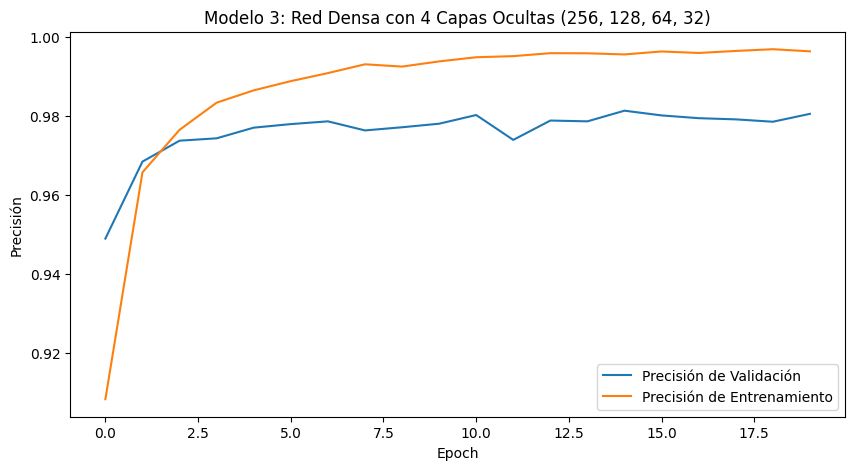

In [ ]:
# Modelo 3: Red Densa con 4 Capas Ocultas
def create_dense_model_3():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),  # Aplanar la entrada
        Dense(256, activation='relu'),    # Primera capa oculta con 256 neuronas
        Dense(128, activation='relu'),    # Segunda capa oculta con 128 neuronas
        Dense(64, activation='relu'),     # Tercera capa oculta con 64 neuronas
        Dense(32, activation='relu'),     # Cuarta capa oculta con 32 neuronas
        Dense(10, activation='softmax')  # Capa de salida
    ])
    return model

# Crear el modelo
model_3 = create_dense_model_3()

# Compilar el modelo
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_3 = model_3.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_3.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 3: Red Densa con 4 Capas Ocultas (256, 128, 64, 32)")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


###**Observaciones Modelo 3 (sin optimizaciones):**

En este modelo se agrego una capa mas de 256 neuronas. Gracias a esto se puede observar que converge mas rapido que los pimeros dos modelos, pero su grafica se caracteriza por presentar picos mas pronunciados en la precision de validacion, esto quiere decir que hay mayores diferencias entre las presiciones y las perdidas provocando una menor estabilidad entre las epocas.

Este modelo es el mas preciso debido a la incorporacion de la capa adicional mas densa, pero también provoca que sea el más susceptible al sobreajuste por el aumento de su complejidad.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
469/469 - 27s - 58ms/step - accuracy: 0.6220 - loss: 1.5053 - val_accuracy: 0.9454 - val_loss: 0.5574 - learning_rate: 0.0010
Epoch 2/20
469/469 - 41s - 88ms/step - accuracy: 0.8544 - loss: 0.8288 - val_accuracy: 0.9567 - val_loss: 0.4643 - learning_rate: 9.0000e-04
Epoch 3/20
469/469 - 41s - 87ms/step - accuracy: 0.8846 - loss: 0.7048 - val_accuracy: 0.9631 - val_loss: 0.4125 - learning_rate: 8.1000e-04
Epoch 4/20
469/469 - 41s - 88ms/step - accuracy: 0.8977 - loss: 0.6287 - val_accuracy: 0.9619 - val_loss: 0.3810 - learning_rate: 7.2900e-04
Epoch 5/20
469/469 - 27s - 57ms/step - accuracy: 0.9054 - loss: 0.5815 - val_accuracy: 0.9704 - val_loss: 0.3420 - learning_rate: 6.5610e-04
Epoch 6/20
469/469 - 27s - 58ms/step - accuracy: 0.9087 - loss: 0.5548 - val_accuracy: 0.9719 - val_loss: 0.3235 - learning_rate: 5.9049e-04
Epoch 7/20
469/469 - 25s - 53ms/step - accuracy: 0.9159 - loss: 0.5225 - val_accuracy: 0.9726 - val_loss: 0.3119 - learning_rate: 5.3144e-04
Epoch 8/20
469/46

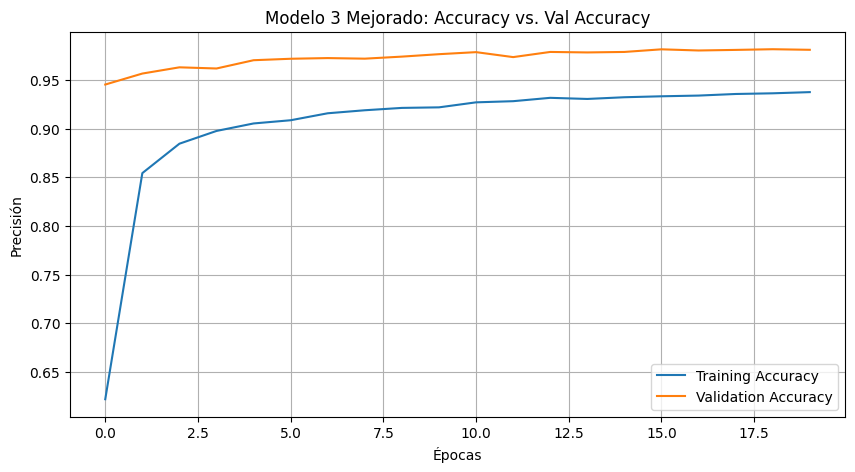

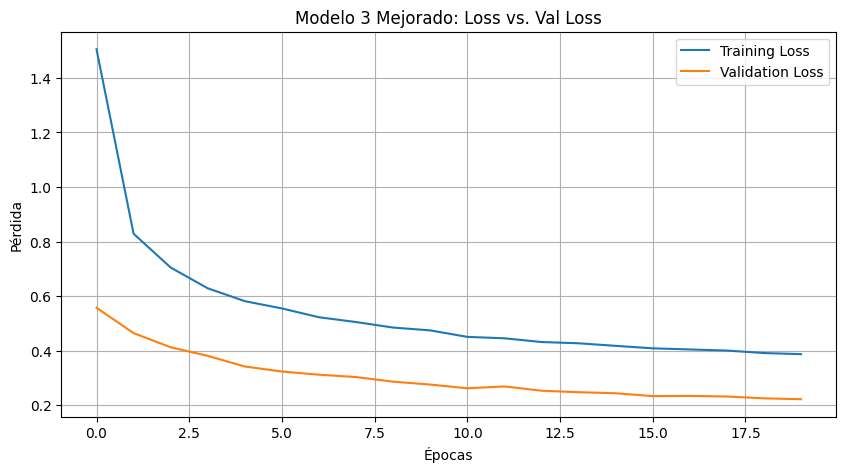

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Arquitectura del Modelo Mejorado
def create_optimized_model_3():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

# Crear el modelo
optimized_model_3 = create_optimized_model_3()

# Compilar el modelo
optimized_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Entrenamiento del modelo mejorado
history_optimized = optimized_model_3.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

# Graficar el historial del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.title("Modelo 3 Mejorado: Accuracy vs. Val Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_optimized.history['loss'], label='Training Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.title("Modelo 3 Mejorado: Loss vs. Val Loss")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()


###**Observaciones Modelo 3 (con optimizaciones):**

Al ser el modelo mas complejo por la adicion de una capa mas densa, se decidio de aplicar distintas optimizaciones para reducir el sobreajuste, y tambien para evitar el sobre-entrenamiento.
Esto lo vuelve el modelo mas estable entre epocas ya que no presenta ningun pico pronunciado. Sin embargo es mucho menos preciso que los modelos anteriores, con una diferencia de 0,07.

**Optimizaciones aplicadas:**
* **Dropout y L2:** El primero usado para reducir el ajuste, mediante la inhivision de cierto porcentaje de neuronas.  Presentando en las capas mas densas un dropout mayor que en las capas mas pequeñas, para no reducir demasiado la capacidad de aprendizaje.
El segundo añade penalización al peso de las neuronas para reducir la complejidad del modelo.
* **Early Stopping:** Utilizado para detener el entrenamiento si la validacion deja de mejorar. Para reducir el riesgo de sobreajuste.
* **Data Augmentation:** Usado para generar nuevas variaciones del dataset para robustez.
* **Scheduler de Learning Rate:** Aplicado para ajustar la tasa de aprendizaje en funcion de las epocas. Esto permite al modelo refinar los pesos sin hacer cambios abruptos en etapas avanzadas.

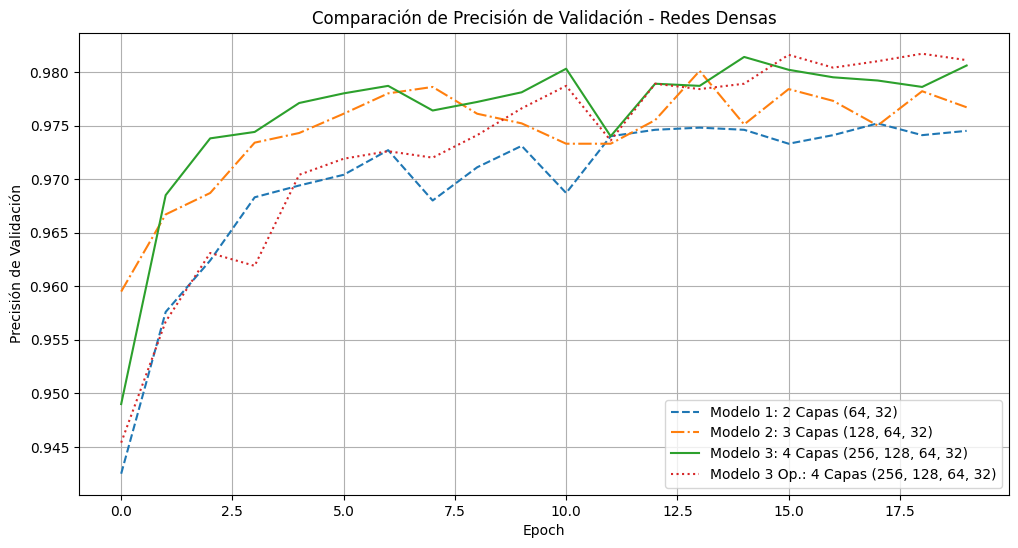

In [ ]:
# Graficar las curvas de precisión de validación de los 3 modelos densos
plt.figure(figsize=(12, 6))

# Modelo 1
plt.plot(history_1.history['val_accuracy'], label="Modelo 1: 2 Capas (64, 32)", linestyle='--')

# Modelo 2
plt.plot(history_2.history['val_accuracy'], label="Modelo 2: 3 Capas (128, 64, 32)", linestyle='-.')

# Modelo 3 (Sin Optimizaciones)
plt.plot(history_3.history['val_accuracy'], label="Modelo 3: 4 Capas (256, 128, 64, 32)", linestyle='-')

# Modelo 3 (Con Optimizaciones)
plt.plot(history_optimized.history['val_accuracy'], label="Modelo 3 Op.: 4 Capas (256, 128, 64, 32)", linestyle=':')

# Configurar el gráfico
plt.title("Comparación de Precisión de Validación - Redes Densas")
plt.xlabel("Epoch")
plt.ylabel("Precisión de Validación")
plt.legend()
plt.grid(True)
plt.show()


##**Crear redes CNN y entrenarlas:**

Epoch 1/20
469/469 - 46s - 99ms/step - accuracy: 0.9378 - loss: 0.2100 - val_accuracy: 0.9836 - val_loss: 0.0546
Epoch 2/20
469/469 - 86s - 183ms/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9848 - val_loss: 0.0512
Epoch 3/20
469/469 - 46s - 97ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9884 - val_loss: 0.0368
Epoch 4/20
469/469 - 83s - 177ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9890 - val_loss: 0.0312
Epoch 5/20
469/469 - 81s - 172ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9884 - val_loss: 0.0344
Epoch 6/20
469/469 - 46s - 99ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9917 - val_loss: 0.0252
Epoch 7/20
469/469 - 81s - 172ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9882 - val_loss: 0.0357
Epoch 8/20
469/469 - 45s - 96ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9891 - val_loss: 0.0368
Epoch 9/20
469/469 - 46s - 99ms/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.992

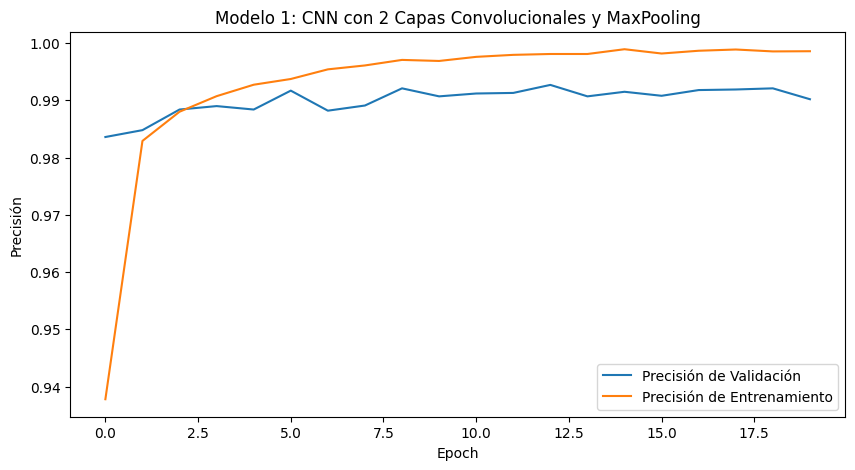

In [ ]:
# Modelo 1: CNN con 2 Capas Convolucionales y MaxPooling
def create_cnn_model_1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Conv2D(64, (3, 3), activation='relu'),                          # 2ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Flatten(),                                                      # Aplanar la salida
        Dense(128, activation='relu'),                                  # Capa densa oculta
        Dense(10, activation='softmax')                                 # Capa de salida
    ])
    return model

# Crear el modelo
model_cnn_1 = create_cnn_model_1()

# Compilar el modelo
model_cnn_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn_1 = model_cnn_1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_1.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_cnn_1.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 1: CNN con 2 Capas Convolucionales y MaxPooling")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


Epoch 1/20
469/469 - 55s - 117ms/step - accuracy: 0.9399 - loss: 0.2003 - val_accuracy: 0.9828 - val_loss: 0.0504
Epoch 2/20
469/469 - 81s - 173ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9849 - val_loss: 0.0437
Epoch 3/20
469/469 - 81s - 173ms/step - accuracy: 0.9897 - loss: 0.0348 - val_accuracy: 0.9913 - val_loss: 0.0283
Epoch 4/20
469/469 - 52s - 110ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.9897 - val_loss: 0.0317
Epoch 5/20
469/469 - 52s - 111ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9877 - val_loss: 0.0333
Epoch 6/20
469/469 - 52s - 111ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9906 - val_loss: 0.0313
Epoch 7/20
469/469 - 51s - 108ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9883 - val_loss: 0.0360
Epoch 8/20
469/469 - 83s - 178ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9905 - val_loss: 0.0301
Epoch 9/20
469/469 - 82s - 174ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 

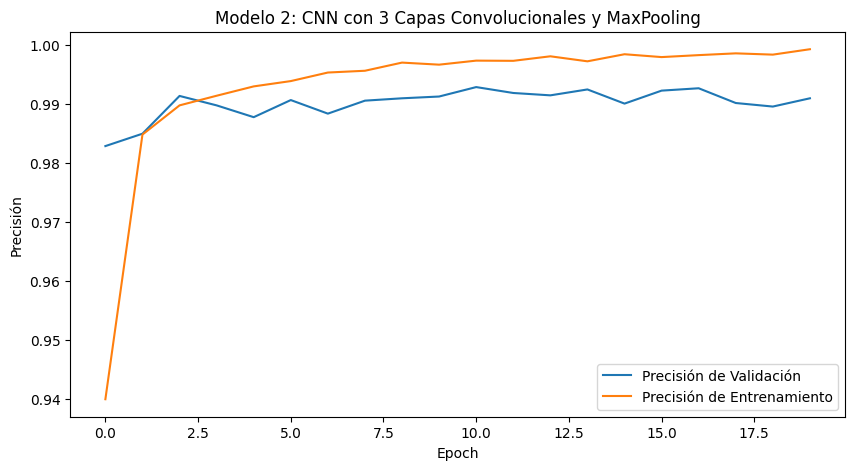

In [ ]:
# Modelo 2: CNN con 3 Capas Convolucionales y MaxPooling
def create_cnn_model_2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Conv2D(64, (3, 3), activation='relu'),                          # 2ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Conv2D(128, (3, 3), activation='relu'),                         # 3ª capa convolucional
        Flatten(),                                                      # Aplanar la salida
        Dense(128, activation='relu'),                                  # Capa densa oculta
        Dense(10, activation='softmax')                                 # Capa de salida
    ])
    return model

# Crear el modelo
model_cnn_2 = create_cnn_model_2()

# Compilar el modelo
model_cnn_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn_2 = model_cnn_2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_2.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_cnn_2.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 2: CNN con 3 Capas Convolucionales y MaxPooling")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


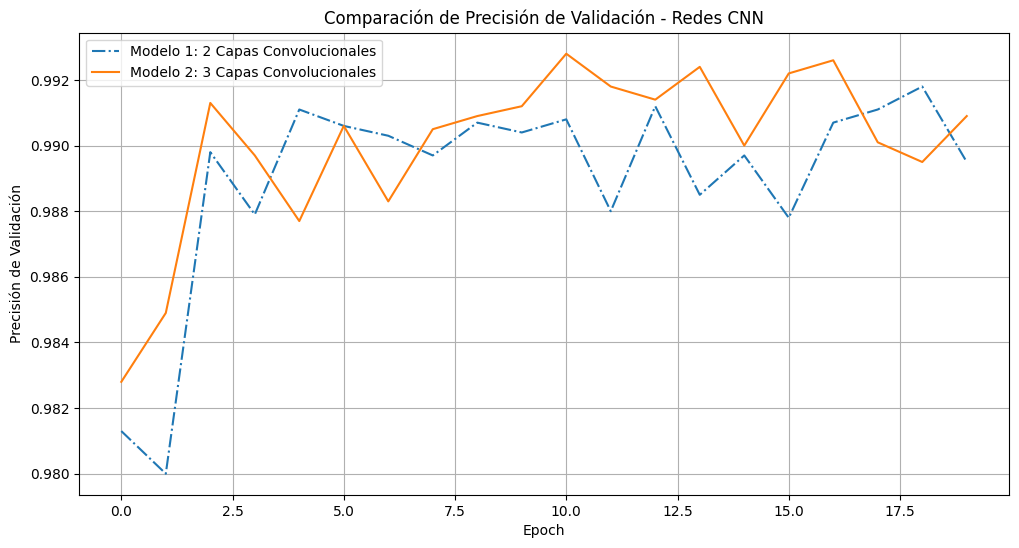

In [ ]:
# Graficar las curvas de precisión de validación de los 3 modelos CNN
plt.figure(figsize=(12, 6))

# Modelo 1
plt.plot(history_cnn_1.history['val_accuracy'], label="Modelo 1: 2 Capas Convolucionales", linestyle='-.')

# Modelo 2
plt.plot(history_cnn_2.history['val_accuracy'], label="Modelo 2: 3 Capas Convolucionales", linestyle='-')

# Configurar el gráfico
plt.title("Comparación de Precisión de Validación - Redes CNN")
plt.xlabel("Epoch")
plt.ylabel("Precisión de Validación")
plt.legend()
plt.grid(True)
plt.show()


###**Observaciones CNN, Modelo 1 y 2:**

Este tipo de arquitectura aprovecha las relaciones espaciales entre los píxeles de las imágenes. Los filtros en las capas convolucionales son capaces de capturar características importantes como bordes o patrones.
Las capas de pooling reducen la dimensionalidad de los datos mientras mantienen las características esenciales, haciendo los modelos más eficientes.

Ambos modelos logran altas presiciones en validacion, pero el segundo modelo tiene una ventaja marginal de 0.16.
El primer modelo converge mas rapido, mientras que el segundo modelo necesita mas tiempo para converger pero tiene un rendimiento más consistente.
El segundo modelo al presentar menos picos, es mas robusto, es decir, tiene menos fluctuaciones en las validaciones.

###**Comparación: Redes Densas vs. CNN**

**Precisión:** Las CNN generalmente superaron a las redes densas en todas las métricas, logrando un mejor desempeño en validación y manejando de manera más efectiva las imágenes de MNIST.

**Eficiencia:** Aunque las redes densas son más rápidas de entrenar y más simples de implementar, las CNN aprovechan mejor las estructuras espaciales, lo que se traduce en una mayor capacidad de generalización.

**Comparaciones generales de los Modoles:**

| Modelo                         | Precisión (Entrenamiento) | Precisión (Validación) | Diferencia (%) |
|--------------------------------|---------------------------|------------------------|----------------|
| Modelo Denso 1                 | 99.58%                    | 97.67%                 | 1.91%          |
| Modelo Denso 2                 | 99.72%                    | 97.73%                 | 1.99%          |
| Modelo Denso 3 (Sin Opt.)      | 99.69%                    | 98.20%                 | 1.49%          |
| Modelo Denso 3 (Opt.)          | 93.76%                    | 98.17%                 | 4.41%          |
| Modelo CNN 1                   | 99.95%                    | 98.88%                 | 1.07%          |
| Modelo CNN 2                   | 99.85%                    | 99.04%                 | 0.81%          |


**Observaciones:**
* Las CNN superan a las redes densas en términos de precisión de validación, destacando el Modelo CNN 2 con 99.04%.
* El Modelo Denso 3 optimizado alcanza una precisión muy buena (98.17%) pero tiene mayor diferencia entre precisión de entrenamiento y validación, lo que indica un mayor riesgo de sobreajuste.
* El Modelo Denso 3 sin optimizar tiene una precisión bastante cercana a la de los otros modelos densos, lo que sugiere que las optimizaciones no siempre son necesarias para obtener buen rendimiento.


**Perdida en Entrenamiento y Validación:**

| Modelo                         | Pérdida (Entrenamiento)  | Pérdida (Validación)   | Diferencia (%) |
|--------------------------------|---------------------------|------------------------|----------------|
| Modelo Denso 1                 | 0.0151                    | 0.0902                 | +496.69%       |
| Modelo Denso 2                 | 0.0091                    | 0.1079                 | +1085.71%      |
| Modelo Denso 3 (Sin Opt.)      | 0.0101                    | 0.1082                 | +975.23%       |
| Modelo Denso 3 (Opt.)          | 0.3872                    | 0.2219                 | -42.67%        |
| Modelo CNN 1                   | 0.0020                    | 0.0577                 | +2785%         |
| Modelo CNN 2                   | 0.0046                    | 0.0456                 | +891.3%        |


**Observaciones:**
* Las CNN tienen menores pérdidas en validación comparado con las redes densas, con el Modelo CNN 2 alcanzando la menor pérdida en validación (0.0456).
* El Modelo Denso 3 optimizado muestra una mejora en la pérdida de validación al reducirla significativamente, pero sigue siendo más alta que la de las CNN.

**Tiempo de Entrenamiento por Época:**

| Modelo                         | Tiempo por Época        |
|--------------------------------|-------------------------|
| Modelo Denso 1                 | ~5-7 segundos           |
| Modelo Denso 2                 | ~5-7 segundos           |
| Modelo Denso 3 (Sin Opt.)      | ~6-8 segundos           |
| Modelo Denso 3 (Opt.)          | ~6-9 segundos           |
| Modelo CNN 1                   | ~45-84 segundos         |
| Modelo CNN 2                   | ~51-84 segundos         |


**Observaciones:**
* Las redes densas son significativamente más rápidas que las CNN, que requieren más tiempo debido a la mayor complejidad de las convoluciones y el pooling.
* Las CNN tienen un tiempo de entrenamiento considerablemente mayor, pero ofrecen una mejor precisión y robustez.



# **DATASET CIFAR-10 CON LOS MODELOS PLANTEADOS ANTERIORMENTE:**

**Grupo:** Ferreras Camila, Godoy Sthepanie Andrea

DATAST: CIFAR-10

El dataset CIFAR-10 es un conjunto de datos de imágenes a color (32x32 píxeles, 3 canales RGB) que contiene 60,000 ejemplos divididos en 10 clases balanceadas, cada una con 6,000 imágenes. Las categorías incluyen: avión, automóvil, pájaro, gato, venado, perro, rana, caballo, barco y camión.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


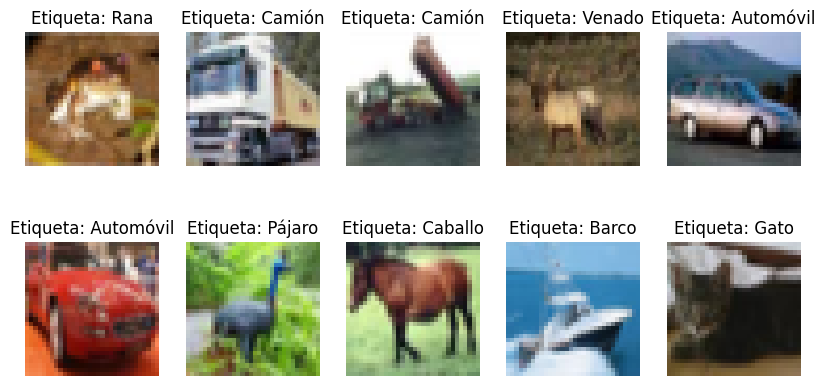

In [ ]:
# Importación de librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar y preparar los datos
# Convertir los valores de los píxeles al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas en formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualización de ejemplos
plt.figure(figsize=(10, 5))
class_names = ["Avión", "Automóvil", "Pájaro", "Gato", "Venado",
               "Perro", "Rana", "Caballo", "Barco", "Camión"]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])  # Mostrar imagen a color
    plt.title(f"Etiqueta: {class_names[np.argmax(y_train[i])]}")
    plt.axis("off")
plt.show()


###**Cambios realizados respecto a MNIST:**
**Formato de datos:**

CIFAR-10 contiene imágenes a color con dimensiones (32, 32, 3), por lo que no se requiere expandir dimensiones como en MNIST.
Las imágenes ya tienen 3 canales RGB, a diferencia del único canal en escala de grises del MNIST.

**Normalización:**

Los valores de los píxeles, originalmente en el rango [0, 255], se normalizan a [0, 1] dividiendo por 255. Esto mejora la estabilidad y velocidad del entrenamiento, similar al caso de MNIST.

**Conversión de etiquetas:**

Se utiliza to_categorical para transformar las etiquetas (de forma (N, 1)) a formato categórico (N, 10).

**Visualización:**

Las imágenes se visualizan a color directamente sin utilizar cmap="gray".
Se añaden nombres de las clases (en este caso, etiquetas de CIFAR-10 como "Avión", "Automóvil", etc.).

##**Crear Redes Neuronales densas y entrenarlas:**

Epoch 1/20
391/391 - 5s - 12ms/step - accuracy: 0.2624 - loss: 2.0249 - val_accuracy: 0.3333 - val_loss: 1.8645
Epoch 2/20
391/391 - 5s - 12ms/step - accuracy: 0.3437 - loss: 1.8375 - val_accuracy: 0.3485 - val_loss: 1.8048
Epoch 3/20
391/391 - 3s - 8ms/step - accuracy: 0.3649 - loss: 1.7807 - val_accuracy: 0.3688 - val_loss: 1.7625
Epoch 4/20
391/391 - 5s - 12ms/step - accuracy: 0.3775 - loss: 1.7410 - val_accuracy: 0.3871 - val_loss: 1.7187
Epoch 5/20
391/391 - 3s - 7ms/step - accuracy: 0.3900 - loss: 1.7069 - val_accuracy: 0.3962 - val_loss: 1.6971
Epoch 6/20
391/391 - 3s - 7ms/step - accuracy: 0.4001 - loss: 1.6784 - val_accuracy: 0.3982 - val_loss: 1.6755
Epoch 7/20
391/391 - 6s - 15ms/step - accuracy: 0.4110 - loss: 1.6548 - val_accuracy: 0.4072 - val_loss: 1.6503
Epoch 8/20
391/391 - 4s - 11ms/step - accuracy: 0.4172 - loss: 1.6356 - val_accuracy: 0.4117 - val_loss: 1.6338
Epoch 9/20
391/391 - 3s - 8ms/step - accuracy: 0.4199 - loss: 1.6249 - val_accuracy: 0.4130 - val_loss: 1.6

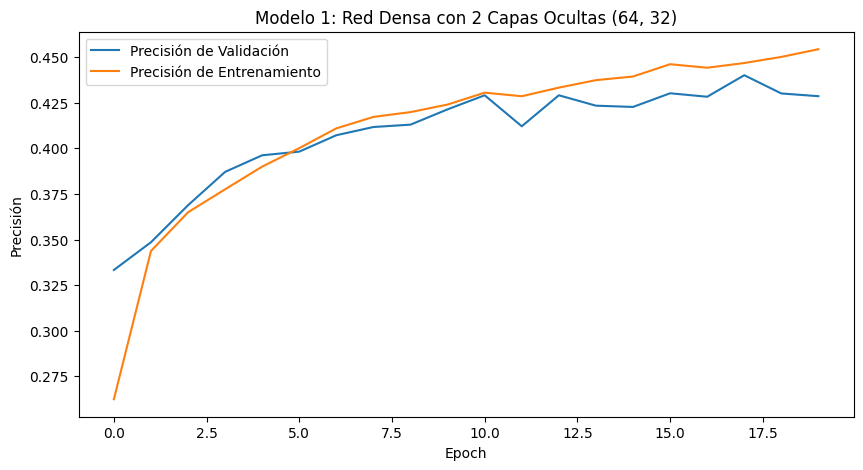

In [ ]:
# Modelo 1: Red Densa con 2 Capas Ocultas
def create_dense_model_1():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Aplanar la entrada
        Dense(64, activation='relu'),     # Primera capa oculta con 64 neuronas
        Dense(32, activation='relu'),     # Segunda capa oculta con 32 neuronas
        Dense(10, activation='softmax')  # Capa de salida
    ])
    return model

# Crear el modelo
model_1 = create_dense_model_1()

# Compilar el modelo
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_1 = model_1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_1.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 1: Red Densa con 2 Capas Ocultas (64, 32)")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()

Epoch 1/20
391/391 - 6s - 15ms/step - accuracy: 0.2872 - loss: 1.9737 - val_accuracy: 0.3504 - val_loss: 1.8184
Epoch 2/20
391/391 - 7s - 18ms/step - accuracy: 0.3661 - loss: 1.7666 - val_accuracy: 0.3857 - val_loss: 1.7231
Epoch 3/20
391/391 - 8s - 19ms/step - accuracy: 0.3995 - loss: 1.6753 - val_accuracy: 0.3943 - val_loss: 1.6895
Epoch 4/20
391/391 - 7s - 17ms/step - accuracy: 0.4219 - loss: 1.6173 - val_accuracy: 0.4315 - val_loss: 1.5815
Epoch 5/20
391/391 - 4s - 10ms/step - accuracy: 0.4376 - loss: 1.5693 - val_accuracy: 0.4318 - val_loss: 1.5938
Epoch 6/20
391/391 - 4s - 10ms/step - accuracy: 0.4475 - loss: 1.5418 - val_accuracy: 0.4275 - val_loss: 1.5907
Epoch 7/20
391/391 - 6s - 15ms/step - accuracy: 0.4602 - loss: 1.5070 - val_accuracy: 0.4574 - val_loss: 1.5085
Epoch 8/20
391/391 - 4s - 11ms/step - accuracy: 0.4659 - loss: 1.4882 - val_accuracy: 0.4526 - val_loss: 1.5343
Epoch 9/20
391/391 - 5s - 12ms/step - accuracy: 0.4722 - loss: 1.4766 - val_accuracy: 0.4643 - val_loss:

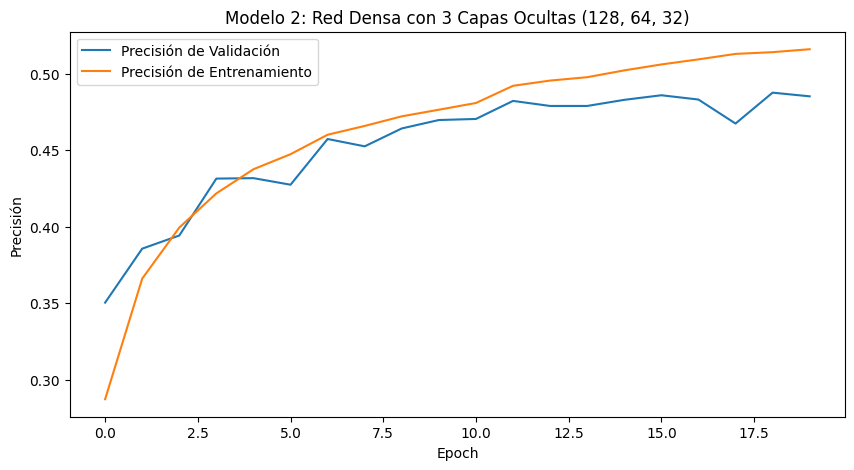

In [ ]:
# Modelo 2: Red Densa con 3 Capas Ocultas
def create_dense_model_2():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Aplanar la entrada
        Dense(128, activation='relu'),    # Primera capa oculta con 128 neuronas
        Dense(64, activation='relu'),     # Segunda capa oculta con 64 neuronas
        Dense(32, activation='relu'),     # Tercera capa oculta con 32 neuronas
        Dense(10, activation='softmax')  # Capa de salida
    ])
    return model

# Crear el modelo
model_2 = create_dense_model_2()

# Compilar el modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_2 = model_2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_2.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 2: Red Densa con 3 Capas Ocultas (128, 64, 32)")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()

Epoch 1/20
391/391 - 9s - 23ms/step - accuracy: 0.2960 - loss: 1.9316 - val_accuracy: 0.3655 - val_loss: 1.7606
Epoch 2/20
391/391 - 10s - 25ms/step - accuracy: 0.3819 - loss: 1.7220 - val_accuracy: 0.4015 - val_loss: 1.6713
Epoch 3/20
391/391 - 8s - 22ms/step - accuracy: 0.4143 - loss: 1.6383 - val_accuracy: 0.4356 - val_loss: 1.5852
Epoch 4/20
391/391 - 10s - 26ms/step - accuracy: 0.4343 - loss: 1.5756 - val_accuracy: 0.4293 - val_loss: 1.5810
Epoch 5/20
391/391 - 8s - 19ms/step - accuracy: 0.4515 - loss: 1.5352 - val_accuracy: 0.4543 - val_loss: 1.5180
Epoch 6/20
391/391 - 9s - 22ms/step - accuracy: 0.4650 - loss: 1.4977 - val_accuracy: 0.4532 - val_loss: 1.5308
Epoch 7/20
391/391 - 8s - 22ms/step - accuracy: 0.4736 - loss: 1.4671 - val_accuracy: 0.4675 - val_loss: 1.4860
Epoch 8/20
391/391 - 10s - 26ms/step - accuracy: 0.4837 - loss: 1.4424 - val_accuracy: 0.4612 - val_loss: 1.5105
Epoch 9/20
391/391 - 8s - 22ms/step - accuracy: 0.4919 - loss: 1.4239 - val_accuracy: 0.4800 - val_lo

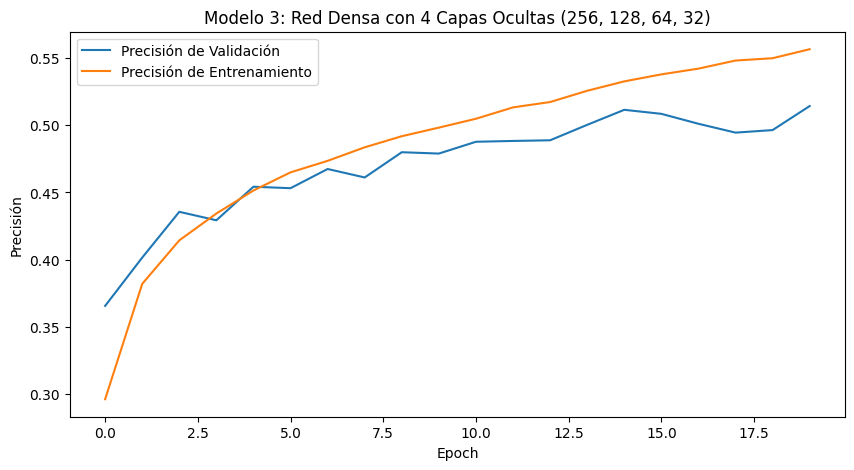

In [ ]:
# Modelo 3: Red Densa con 4 Capas Ocultas
def create_dense_model_3():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Aplanar la entrada
        Dense(256, activation='relu'),    # Primera capa oculta con 256 neuronas
        Dense(128, activation='relu'),    # Segunda capa oculta con 128 neuronas
        Dense(64, activation='relu'),     # Tercera capa oculta con 64 neuronas
        Dense(32, activation='relu'),     # Cuarta capa oculta con 32 neuronas
        Dense(10, activation='softmax')  # Capa de salida
    ])
    return model

# Crear el modelo
model_3 = create_dense_model_3()

# Compilar el modelo
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_3 = model_3.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_3.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 3: Red Densa con 4 Capas Ocultas (256, 128, 64, 32)")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 - 45s - 115ms/step - accuracy: 0.1576 - loss: 2.4929 - val_accuracy: 0.2406 - val_loss: 2.1545 - learning_rate: 0.0010
Epoch 2/20
391/391 - 82s - 209ms/step - accuracy: 0.2183 - loss: 2.1556 - val_accuracy: 0.2773 - val_loss: 2.0239 - learning_rate: 9.0000e-04
Epoch 3/20
391/391 - 43s - 111ms/step - accuracy: 0.2428 - loss: 2.0768 - val_accuracy: 0.2907 - val_loss: 1.9788 - learning_rate: 8.1000e-04
Epoch 4/20
391/391 - 81s - 208ms/step - accuracy: 0.2515 - loss: 2.0453 - val_accuracy: 0.2965 - val_loss: 1.9397 - learning_rate: 7.2900e-04
Epoch 5/20
391/391 - 83s - 212ms/step - accuracy: 0.2548 - loss: 2.0264 - val_accuracy: 0.3040 - val_loss: 1.9347 - learning_rate: 6.5610e-04
Epoch 6/20
391/391 - 80s - 204ms/step - accuracy: 0.2603 - loss: 2.0138 - val_accuracy: 0.3125 - val_loss: 1.9170 - learning_rate: 5.9049e-04
Epoch 7/20
391/391 - 42s - 107ms/step - accuracy: 0.2679 - loss: 1.9979 - val_accuracy: 0.3225 - val_loss: 1.8955 - learning_rate: 5.3144e-04
Epoch 8/20
391/391 - 

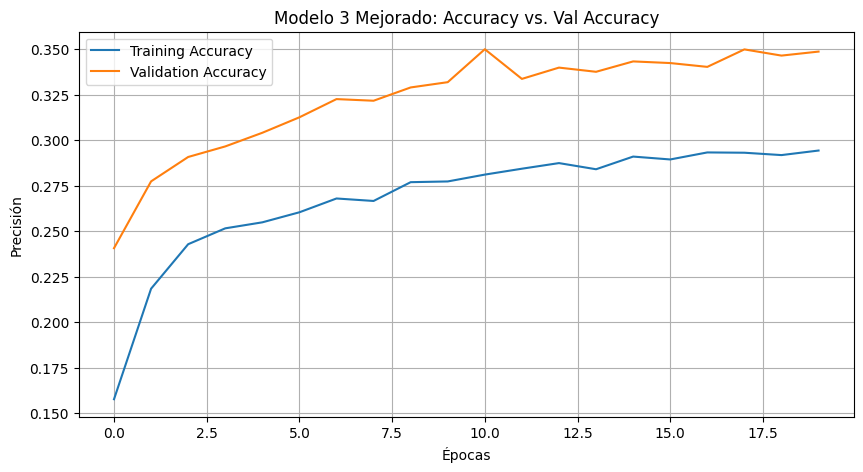

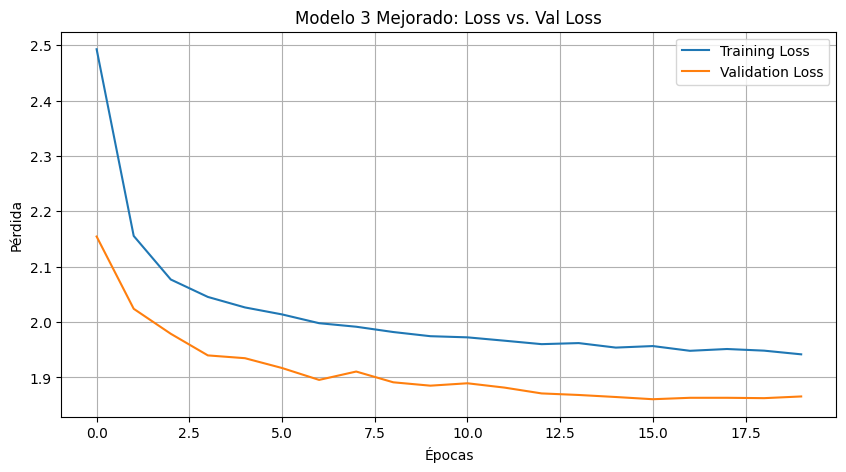

In [ ]:
# Modelo 3: OPTIMIZADO

from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Arquitectura del Modelo Mejorado
def create_optimized_model_3():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

# Crear el modelo
optimized_model_3 = create_optimized_model_3()

# Compilar el modelo
optimized_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Entrenamiento del modelo mejorado
history_optimized = optimized_model_3.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

# Graficar el historial del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.title("Modelo 3 Mejorado: Accuracy vs. Val Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_optimized.history['loss'], label='Training Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.title("Modelo 3 Mejorado: Loss vs. Val Loss")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()

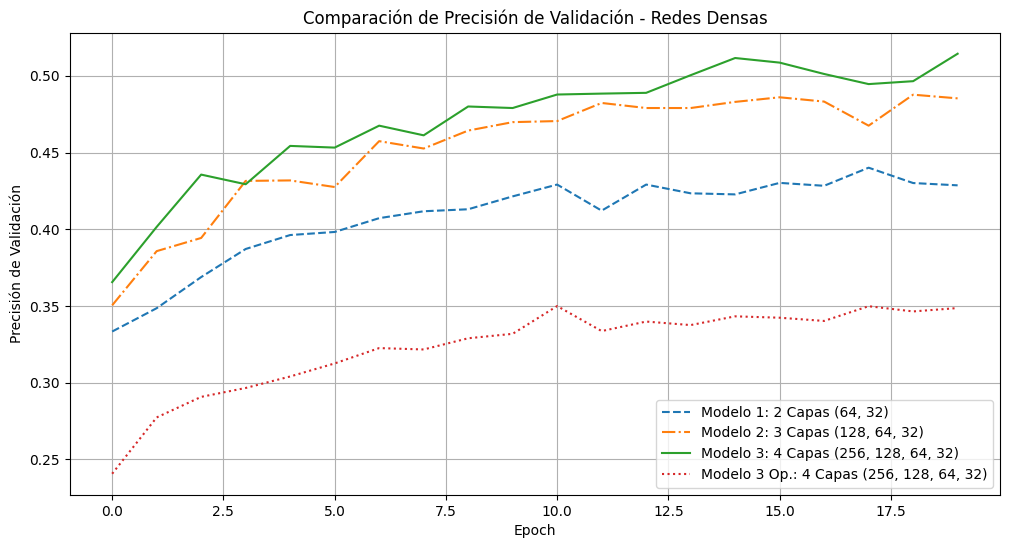

In [ ]:
# Graficar las curvas de precisión de validación de los 3 modelos densos
plt.figure(figsize=(12, 6))

# Modelo 1
plt.plot(history_1.history['val_accuracy'], label="Modelo 1: 2 Capas (64, 32)", linestyle='--')

# Modelo 2
plt.plot(history_2.history['val_accuracy'], label="Modelo 2: 3 Capas (128, 64, 32)", linestyle='-.')

# Modelo 3 (Sin Optimizaciones)
plt.plot(history_3.history['val_accuracy'], label="Modelo 3: 4 Capas (256, 128, 64, 32)", linestyle='-')

# Modelo 3 (Con Optimizaciones)
plt.plot(history_optimized.history['val_accuracy'], label="Modelo 3 Op.: 4 Capas (256, 128, 64, 32)", linestyle=':')

# Configurar el gráfico
plt.title("Comparación de Precisión de Validación - Redes Densas")
plt.xlabel("Epoch")
plt.ylabel("Precisión de Validación")
plt.legend()
plt.grid(True)
plt.show()

## **OBSERVACIONES MODELO 1,2,3 Y 3 OP**

**Modelo 1:**
Es el modelo más rapido, los tiempos de epoch son entre 3s y 7s, debido a la arquitectura simple. Se logra estabilizar cerca del final en un valor de 0,42 de presicion de validacion, aunque tiene una capacidad limitada para los patrones complejos que dispone el dataset.

**Modelo 2:**
Es un poco mas lento y tiene mayor costo computacional que el modelo 1, debido a la capa adicional, se llega a un valor de 0.487 sin embargo en el grafico se puede observar que auqnue se estabiliza con el tiempo, al final hay una gran oscilacion indicando un posible inicio de sobreajuste.


**Modelo 3:**
Comparado con los otros modelos, es mas lento debido a los parametros agregados, se logra una presicion de validacion de 0.514. La perdida de validacion se comporta mas estable y con menos oscilaciones que en el Modelo 2, logrnado un mejor equilibrio entre la precision de entrenamiento y la validacion, de los 3 modelos es el q tiene el comportamiento mas adecuado para el dataset.

**Modelo 3 OP:**
Todas las optimizaciones y restricciones agregadas para regularizar y ser precavidos con el sobreajuste, sumado al aumento de datos, vuelven a este modelo el más lento de todos, con un tiempo por epoch de entre 42 y 83 segundos, lo que sugiere que dichos adicionales limitan la capacidad del modelo para aprender patrones mas complejos, perdiendo precision a pesar de ser el de mayor estabilidad.
Este modelo es mas conveniente para datasets mas simples con menos complejidad en patrones, como en el caso del MNIST.

**Modelo recomendado:**
El modelo planteado que más se adecua al dataset de CIFRA10 es el modelo 3 sin optimización, debido a que ofrece mejor rendimiento de presicion sin comprometer la estabilidad del entrenamiento, logrando el mejor equilibrio entre ambos aspectos. Aunque es más lento que el Modelo 1, se justifica por el aumento significativo de presicion.

## **MODELOS CNN Y ENTRENAMIENTO:**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
391/391 - 64s - 165ms/step - accuracy: 0.4457 - loss: 1.5533 - val_accuracy: 0.5390 - val_loss: 1.3080
Epoch 2/20
391/391 - 60s - 155ms/step - accuracy: 0.5780 - loss: 1.2005 - val_accuracy: 0.5851 - val_loss: 1.1741
Epoch 3/20
391/391 - 81s - 207ms/step - accuracy: 0.6310 - loss: 1.0591 - val_accuracy: 0.6330 - val_loss: 1.0402
Epoch 4/20
391/391 - 83s - 211ms/step - accuracy: 0.6654 - loss: 0.9644 - val_accuracy: 0.6513 - val_loss: 0.9963
Epoch 5/20
391/391 - 83s - 212ms/step - accuracy: 0.6903 - loss: 0.8945 - val_accuracy: 0.6638 - val_loss: 0.9646
Epoch 6/20
391/391 - 83s - 211ms/step - accuracy: 0.7116 - loss: 0.8370 - val_accuracy: 0.6850 - val_loss: 0.9174
Epoch 7/20
391/391 - 80s - 205ms/step - accuracy: 0.7288 - loss: 0.7888 - val_accuracy: 0.6922 - val_loss: 0.8905
Epoch 8/20
391/391 - 81s - 206ms/step - accuracy: 0.7441 - loss: 0.7419 - val_accuracy: 0.6915 - val_loss: 0.8982
Epoch 9/20
391/391 - 82s - 209ms/step - accuracy: 0.7582 - loss: 0.6988 - val_accuracy: 

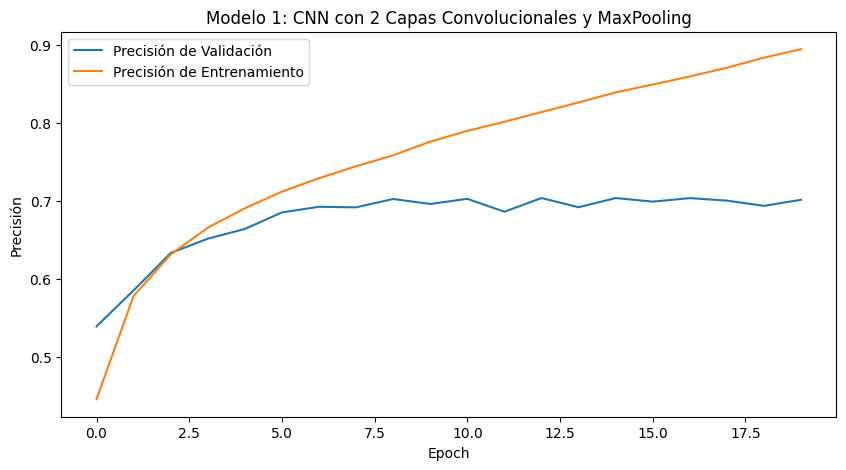

In [ ]:
# Modelo 1: CNN con 2 Capas Convolucionales y MaxPooling
def create_cnn_model_1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # 1ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Conv2D(64, (3, 3), activation='relu'),                          # 2ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Flatten(),                                                      # Aplanar la salida
        Dense(128, activation='relu'),                                  # Capa densa oculta
        Dense(10, activation='softmax')                                 # Capa de salida
    ])
    return model

# Crear el modelo
model_cnn_1 = create_cnn_model_1()

# Compilar el modelo
model_cnn_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn_1 = model_cnn_1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_1.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_cnn_1.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 1: CNN con 2 Capas Convolucionales y MaxPooling")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


Epoch 1/20
391/391 - 70s - 179ms/step - accuracy: 0.4323 - loss: 1.5502 - val_accuracy: 0.5324 - val_loss: 1.2851
Epoch 2/20
391/391 - 82s - 209ms/step - accuracy: 0.5822 - loss: 1.1736 - val_accuracy: 0.5931 - val_loss: 1.1606
Epoch 3/20
391/391 - 81s - 208ms/step - accuracy: 0.6356 - loss: 1.0324 - val_accuracy: 0.6309 - val_loss: 1.0245
Epoch 4/20
391/391 - 68s - 174ms/step - accuracy: 0.6817 - loss: 0.9098 - val_accuracy: 0.6510 - val_loss: 0.9947
Epoch 5/20
391/391 - 68s - 175ms/step - accuracy: 0.7093 - loss: 0.8340 - val_accuracy: 0.6935 - val_loss: 0.8881
Epoch 6/20
391/391 - 82s - 211ms/step - accuracy: 0.7365 - loss: 0.7516 - val_accuracy: 0.7006 - val_loss: 0.8555
Epoch 7/20
391/391 - 81s - 207ms/step - accuracy: 0.7594 - loss: 0.6965 - val_accuracy: 0.7135 - val_loss: 0.8255
Epoch 8/20
391/391 - 81s - 208ms/step - accuracy: 0.7784 - loss: 0.6355 - val_accuracy: 0.7305 - val_loss: 0.7958
Epoch 9/20
391/391 - 67s - 172ms/step - accuracy: 0.7967 - loss: 0.5826 - val_accuracy: 

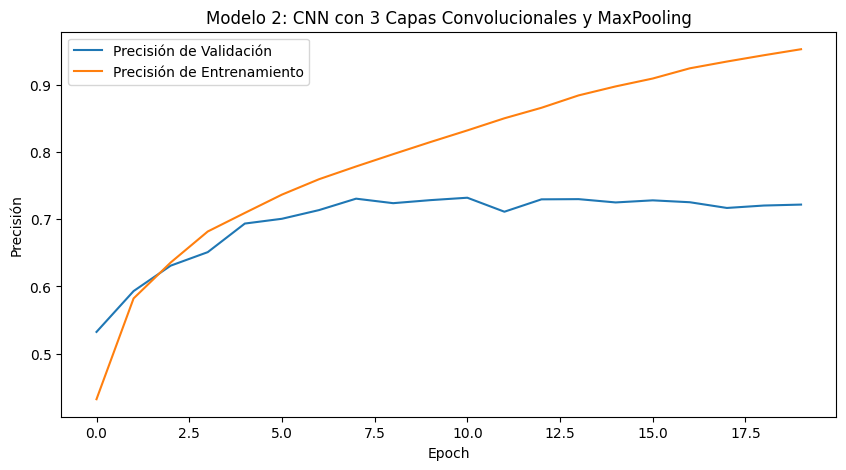

In [ ]:
# Modelo 2: CNN con 3 Capas Convolucionales y MaxPooling
def create_cnn_model_2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # 1ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Conv2D(64, (3, 3), activation='relu'),                          # 2ª capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # MaxPooling
        Conv2D(128, (3, 3), activation='relu'),                         # 3ª capa convolucional
        Flatten(),                                                      # Aplanar la salida
        Dense(128, activation='relu'),                                  # Capa densa oculta
        Dense(10, activation='softmax')                                 # Capa de salida
    ])
    return model

# Crear el modelo
model_cnn_2 = create_cnn_model_2()

# Compilar el modelo
model_cnn_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn_2 = model_cnn_2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=2
)

# Graficar historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_2.history['val_accuracy'], label="Precisión de Validación")
plt.plot(history_cnn_2.history['accuracy'], label="Precisión de Entrenamiento")
plt.title("Modelo 2: CNN con 3 Capas Convolucionales y MaxPooling")
plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.legend()
plt.show()


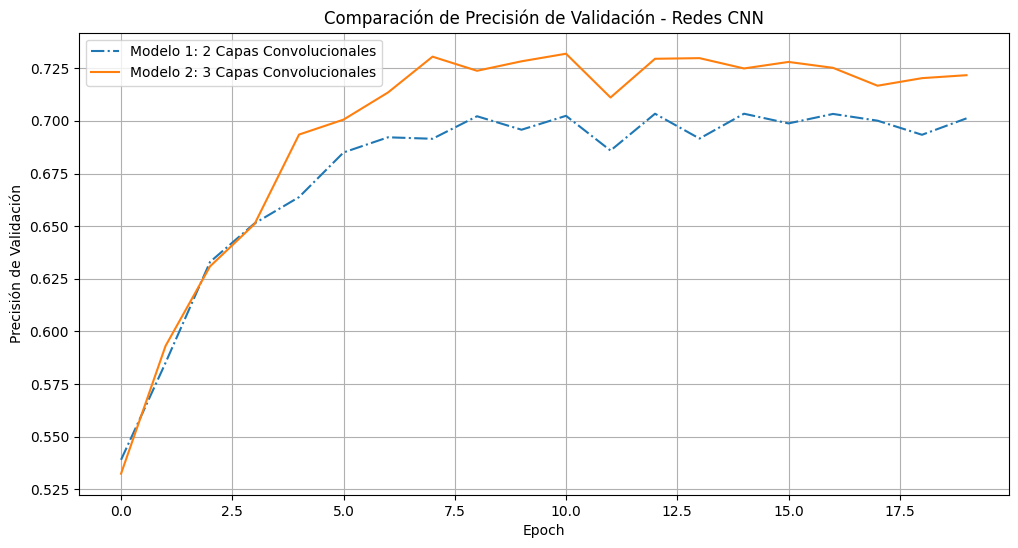

In [ ]:
# Graficar las curvas de precisión de validación de los 3 modelos CNN
plt.figure(figsize=(12, 6))

# Modelo 1
plt.plot(history_cnn_1.history['val_accuracy'], label="Modelo 1: 2 Capas Convolucionales", linestyle='-.')

# Modelo 2
plt.plot(history_cnn_2.history['val_accuracy'], label="Modelo 2: 3 Capas Convolucionales", linestyle='-')

# Configurar el gráfico
plt.title("Comparación de Precisión de Validación - Redes CNN")
plt.xlabel("Epoch")
plt.ylabel("Precisión de Validación")
plt.legend()
plt.grid(True)
plt.show()


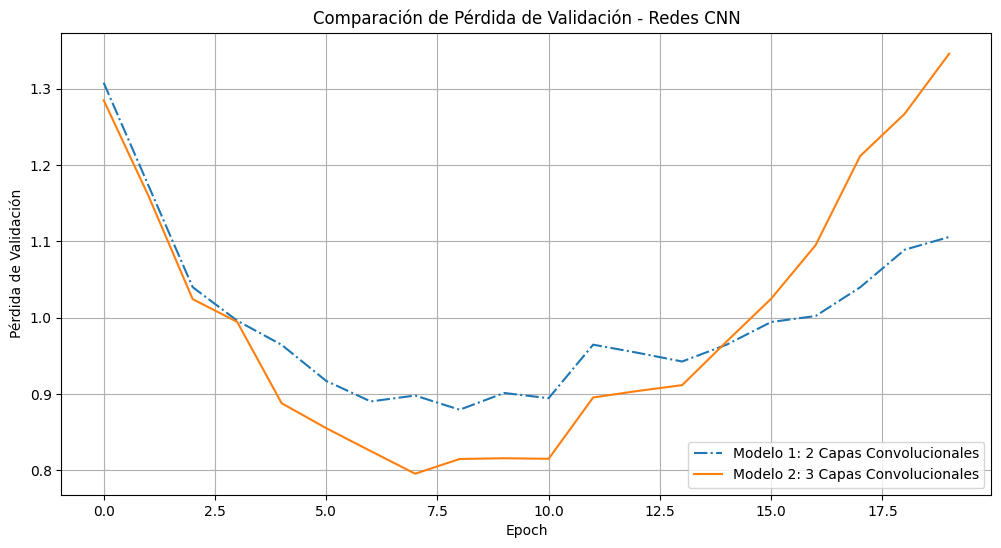

In [ ]:
# Graficar las curvas de pérdida de validación de los 3 modelos CNN
plt.figure(figsize=(12, 6))

# Pérdida de validación del Modelo 1
plt.plot(history_cnn_1.history['val_loss'], label="Modelo 1: 2 Capas Convolucionales", linestyle='-.')

# Pérdida de validación del Modelo 2
plt.plot(history_cnn_2.history['val_loss'], label="Modelo 2: 3 Capas Convolucionales", linestyle='-')

# Configurar el gráfico
plt.title("Comparación de Pérdida de Validación - Redes CNN")
plt.xlabel("Epoch")
plt.ylabel("Pérdida de Validación")
plt.legend()
plt.grid(True)
plt.show()


## **OBSERVACIONES MODELOS CNN:**

**Modelo 1:**
Es el más rapido de los dos, con epochs entre 60 y 84 segundos, logrando una precision de validacion de 0.70.
Se puede observar en su gráfico que se empieza a estabilizar luego de los 10 epochs, tambien se ve en el de perdida que luego del epoch 12 esta comienza a aumentar, lo que sugiere un inicio de sobreajuste, tiene un un buen equilibrio entre complejidad y rendimiento, pero la precisión de 0.70 es limitada para este dataset.

**Modelo 2:**
El tiempo de entrenamiento es un poco más lento, aproximadamente de 7 segundos más por epoch. Se logra una precisión de validación de 0.731, presentando un rendimiento ligeramente superior al del Modelo 1 que luego se estabiliza a los 9 epoch.
Su grafica de pérdida de validación presenta un pico más marcado de aumento a partir del epoch 12, indicando un mayor sobreajuste, lo cual sugiere que el modelo tiene mas capacidad que la necesaria para los datos sin regularizar.

**Observacion del sobreajuste:**
Este sobreajuste presentado en ambos modelos podría regularizarse con la incorporación de L2 y Dropout como vimos anteriomente en Modelo 3 Optimizado de redes densas.

El Modelo 2 es el más conveniente si el objetivo es maximizar la precisión en CIFAR-10. Sin embargo, es necesario implementar técnicas de regularización y/o reducción de parámetros para mitigar el sobreajuste.

# **CONCLUSIONES FINALES:**

El desempeño de los modelos en MNIST y CIFAR-10 evidencia cómo la elección de la arquitectura depende de la complejidad del dataset. En MNIST, los modelos densos, incluso los más simples, logran resultados sobresalientes debido a la naturaleza sencilla del dataset, con imágenes en escala de grises y patrones definidos. Sin embargo, en CIFAR-10, las redes densas tienen limitaciones claras, alcanzando precisiones moderadas (0.50) porque no pueden capturar adecuadamente las relaciones espaciales y jerárquicas presentes en las imágenes a color.

Por otro lado, las CNNs destacan como la arquitectura más adecuada para CIFAR-10, logrando precisiones significativamente mejores (0.73). Estas redes son capaces de extraer características visuales complejas, como bordes y texturas, esenciales para este tipo de dataset. Aunque más lentas, justifican su mayor costo computacional con su superior rendimiento.

Los resultados demuestran que las redes densas son ideales para datasets simples como MNIST, mientras que las CNNs son imprescindibles para abordar datasets con mayor complejidad como CIFAR-10.